<a href="https://colab.research.google.com/github/issatyajit/Heart-Disease-Prediction-Classification-/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data_cardiovascular_risk.csv').drop(columns=['id'])

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

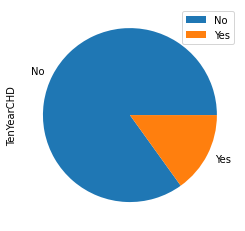

In [ ]:
#Checking imbalance in target variable
pd.DataFrame(df['TenYearCHD'].replace({0:'No',1:'Yes'}).value_counts()).plot(kind='pie',y='TenYearCHD')

In [ ]:
#getting number of null values
value_nulldf = pd.DataFrame(df.isnull().sum(),columns=['value_counts'])
percent_null_df = pd.DataFrame(round(df.isnull().sum() * 100 / df.shape[0],2),columns=['percentage'])
fdf=pd.concat([value_nulldf, percent_null_df],axis=1)
fdf[fdf['value_counts']!=0]

,value_counts,percentage
education,87,2.57
cigsPerDay,22,0.65
BPMeds,44,1.30
totChol,38,1.12
BMI,14,0.41
heartRate,1,0.03
glucose,304,8.97


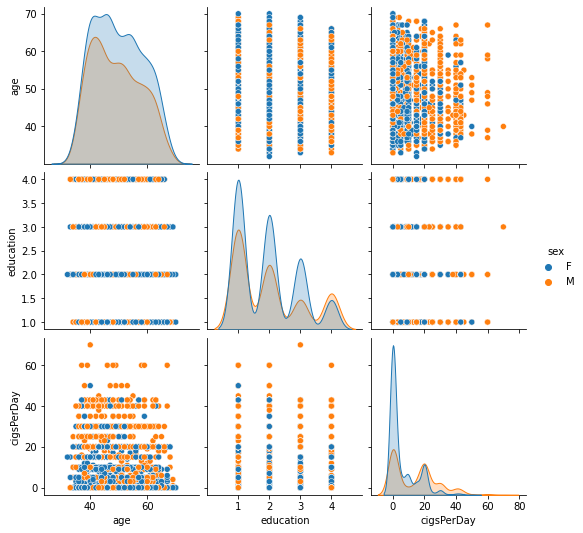

In [ ]:
sns.pairplot(df[['age','sex','education','cigsPerDay']],hue='sex')